# Unsupervised Machine Learning

- A class of machine learning algorithms.
- It **doesn't not have labeled outputs** or a human guiding the learning process. "In unsupervised learning, the learning algorithm is just shown the input data  and asked to extract knowledge from this data."
-  **While this kind of opinions are common in the community, it's never the entire story!** 
- We still need to have some ideas about what to 'look for' in a dataset—more formally, we *often* need a **hypothesis**.
- The algorithm is **only given input data** without predefined answers.
- The goal is to **extract knowledge or patterns** from the input data.


## Types

- **Transformations of the dataset**  
  - Create a new representation of the data for better understanding.
  - Dimensionality reduction reduces features while trying to retain essential characteristics.
  - Example: 
    - Reducing data to two dimensions for visualization.
    - Topic extraction identifies themes in text documents (e.g., tracking social media discussions on elections).

- **Clustering**  
  - Groups similar data points into clusters.
  - Example: Grouping photos of the same person from a bunch of pictures without prior knowledge of identities.

## Challenges

- No predefined labels to verify results. It's difficult—but not impossible—to evaluate performance.
- The algorithm’s grouping may differ from human expectations (e.g., sorting faces by angle rather than identity).

## Uses

- **Exploratory data analysis** to better understand data.
- **Preprocessing for supervised learning** to improve accuracy, reduce memory usage. These are often used even in supervised learning (but remain unsupervised in nature).

## Preprocessing

Some preprocessing methods [Scikit](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) provides (please check the link for an excellent and elaborate guide!):

- **StandardScaler**  
  - $X' = \frac{X - \mu}{\sigma}$ where $\mu$ and $\sigma$ are mean and standard deviation of the feature.
  - Sets each feature’s mean to 0 and variance to 1.
  - Brings features to the same magnitude but doesn't enforce specific minimum or maximum values.

- **RobustScaler**  
  - Similar to StandardScaler but uses median and quartiles instead of mean and variance.
  - **Ignores outliers**, making it more robust to extreme values. 
  - $X' = \frac{X - Q_2}{Q_3 - Q_1}$
    - $Q_2$ = Median (50th percentile)  
    - $Q_1$ = First quartile (25th percentile)  
    - $Q_3$ = Third quartile (75th percentile)  
    - $Q_3 - Q_1$ = Interquartile Range (IQR)  

- **MinMaxScaler**  
  - Scales all features between 0 and 1.
  - Ensures data is contained within a fixed range, 
  - it's useful for models that require normalized input values
  - $X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$


### Median & Interquartile Range (IQR)

**Median:**  

- The middle value of a sorted dataset.
- If there are an even number of values, the median is the average of the two middle values.
- More robust to outliers than the mean.

**Interquartile Range (IQR):**  

- Measures the spread of the middle 50% of data. IQR = Q3 - Q1 where
    - Q1 (First Quartile): 25th percentile (lower quartile).
    - Q3 (Third Quartile): 75th percentile (upper quartile).
- It's useful for detecting outliers (values below (Q1 - 1.5IQR) or above (Q3 + 1.5IQR) are considered outliers).

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use("ggplot")
plt.rcParams["figure.dpi"] = 100
font = {"family": "sans-serif", "size": 12}

mpl.rc("font", **font)

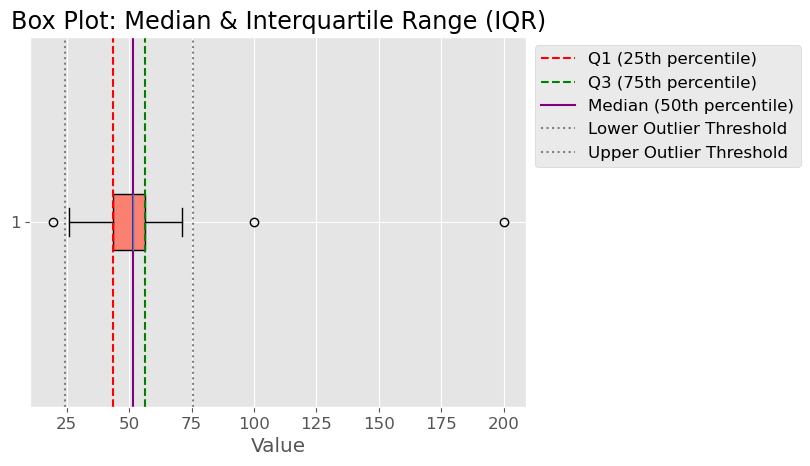

In [72]:
# median and iqr
# sample data with some outliers
data = np.concatenate([np.random.normal(50, 10, 100), [100, 200]])

# box plot (more: https://en.wikipedia.org/wiki/Box_plot)
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor="salmon"))

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Mark Q1, Q3, median, and outlier thresholds
median = np.median(data)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Plot annotations
plt.axvline(Q1, color="r", linestyle="--", label="Q1 (25th percentile)")
plt.axvline(Q3, color="g", linestyle="--", label="Q3 (75th percentile)")
plt.axvline(median, color="purple", linestyle="-", label="Median (50th percentile)")
plt.axvline(
    lower_whisker, color="gray", linestyle="dotted", label="Lower Outlier Threshold"
)
plt.axvline(
    upper_whisker, color="gray", linestyle="dotted", label="Upper Outlier Threshold"
)

# Labels and legend
plt.xlabel("Value")
plt.title("Box Plot: Median & Interquartile Range (IQR)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

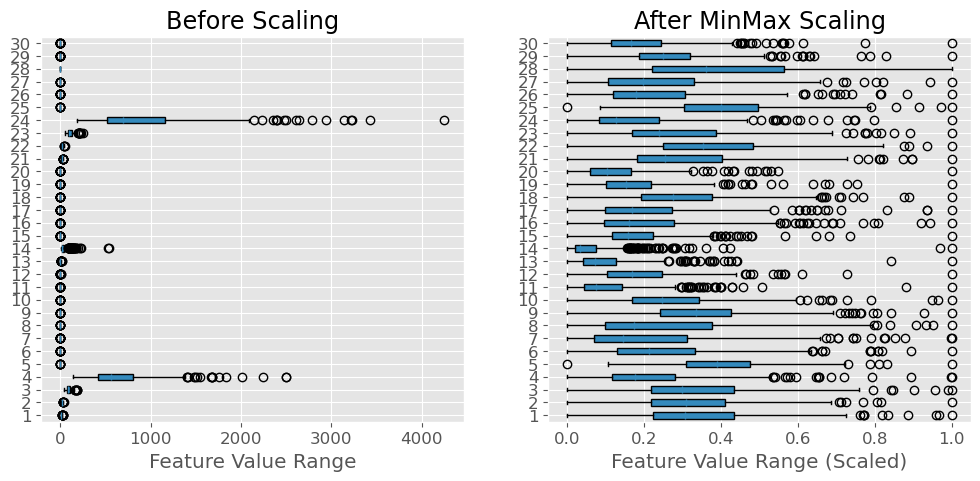

In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)


scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Plot before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(X_train, vert=False, patch_artist=True)
axes[0].set_title("Before Scaling")
axes[0].set_xlabel("Feature Value Range")

axes[1].boxplot(X_train_scaled, vert=False, patch_artist=True)
axes[1].set_title("After MinMax Scaling")
axes[1].set_xlabel("Feature Value Range (Scaled)")

pass;

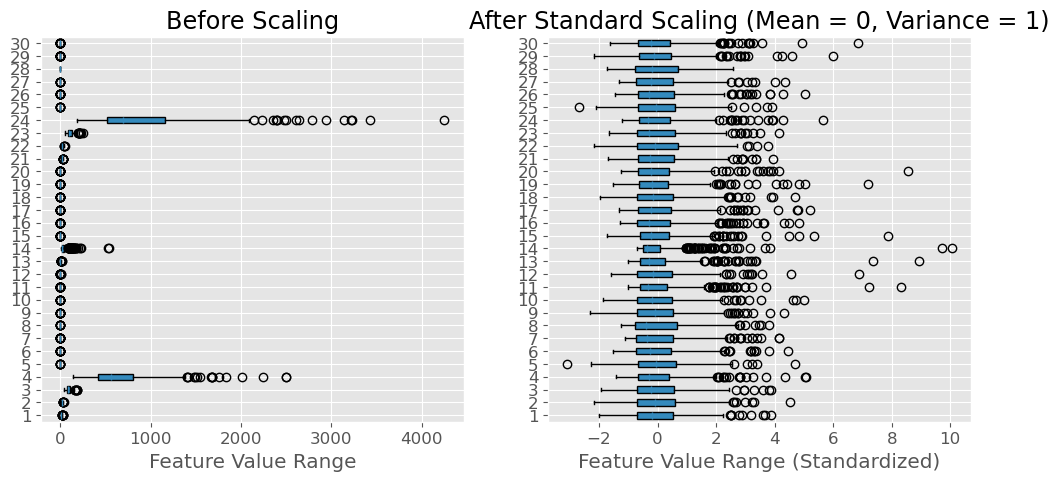

In [74]:
# Scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Plots before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(X_train, vert=False, patch_artist=True)
axes[0].set_title("Before Scaling")
axes[0].set_xlabel("Feature Value Range")

axes[1].boxplot(X_train_scaled, vert=False, patch_artist=True)
axes[1].set_title("After Standard Scaling (Mean = 0, Variance = 1)")
axes[1].set_xlabel("Feature Value Range (Standardized)")

pass;

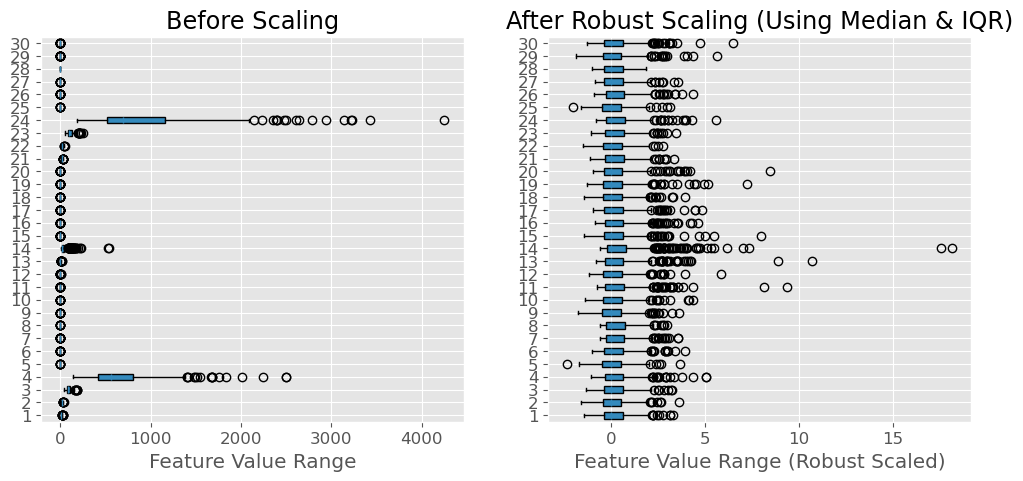

In [75]:
# Scale data using RobustScaler
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Plots before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(X_train, vert=False, patch_artist=True)
axes[0].set_title("Before Scaling")
axes[0].set_xlabel("Feature Value Range")

axes[1].boxplot(X_train_scaled, vert=False, patch_artist=True)
axes[1].set_title("After Robust Scaling (Using Median & IQR)")
axes[1].set_xlabel("Feature Value Range (Robust Scaled)")

pass;

### Common Algorithms for Data Transformation
  - Principal Component Analysis (PCA): often used for visualization and compression  
  - Non-Negative Matrix Factorization (NMF): used for feature extraction  
  - t-SNE: used for 2D scatter plot visualization  

- Principal Component Analysis (PCA)  
  - Rotates the dataset to make features statistically uncorrelated  
  - Finds the directions (principal components) that explain the most variance in the data  
  - The first principal component captures the most variance  
  - The second principal component is orthogonal to the first and captures the next most variance  
  - Can be used for dimensionality reduction by keeping only the most important components  

- Effects of PCA on Data (Illustrated in figure, taken from Guido & Müller, p. 141)  
  - Find principal components (directions of variance)  
  - Rotate data to align components with axes  
  - Reduce dimensionality by keeping only important components  
  - Transform data back to the original space while retaining essential information  

![](images/pca.png)


## Resource on PCA: [check this excellent class note](https://www.cse.psu.edu/~rtc12/CSE586Spring2010/lectures/pcaLectureShort.pdf)

### Covariance and Variance  
- Measure the spread of data around the mean.
- Variance: Deviation of points from the mean in one dimension (i.e. 1 random variable)
- Covariance: Measures how several random variables vary together 
- Covariance of a dimension with itself equals its variance.

$\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$

- $X$ and $Y$: random variables
- $n$: Number of data points (observations) (A denominator $n−1$ is used if a population variance based on a sample variance is calculated.)
- $\bar{X}$ and $\bar{Y}$: Mean of $X$ and $Y$, respectively.

For more than one random variable, one often checks the covariance matrix:
$$
\Sigma =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \text{Cov}(X_1, X_3) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \text{Cov}(X_2, X_3) \\
\text{Cov}(X_3, X_1) & \text{Cov}(X_3, X_2) & \text{Var}(X_3)
\end{bmatrix}
$$

- $\Sigma$: covariance matrix
- Diagonal elements ($\text{Var}(X_i)$) are variances of the random variables $X_1, X_2,$ and $X_3$.
- Off-diagonal elements ($\text{Cov}(X_i, X_j)$) represent covariances between different variables.
- The matrix is symmetric, i.e., $\text{Cov}(X_i, X_j) = \text{Cov}(X_j, X_i)$.


The main steps for PCA:

- Subtract the mean from each feature to center the data around zero: $X_{\text{centered}} = X - \bar{X}$ where $\bar{X}$ is the mean of each feature.
- Calculate the covariance matrix $\Sigma = \frac{1}{n} X_{\text{centered}}^T X_{\text{centered}}$
- Solve for eigenvalues $\lambda$ and eigenvectors $v$: $\Sigma v = \lambda v$
- Eigenvectors represent the principal components, and eigenvalues indicate the amount of variance captured.
- *Select Principal Components*: Sort eigenvectors by their corresponding eigenvalues in descending order. Choose the top $k$ eigenvectors to form the projection matrix: $W = [v_1, v_2, \dots, v_k]$
- Project the original data onto the new subspace: $X_{\text{PCA}} = X_{\text{centered}} W$

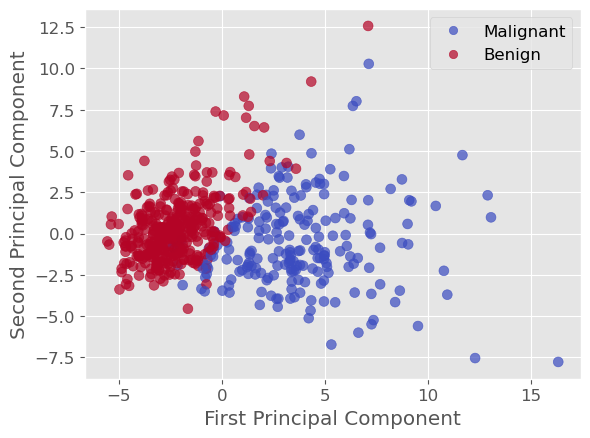

In [86]:
# code adapted from guido and mueller

from sklearn.decomposition import PCA
cancer = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(cancer.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap='coolwarm', alpha=0.7, s=50)
plt.legend(handles=scatter.legend_elements()[0], labels=["Malignant", "Benign"])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component");

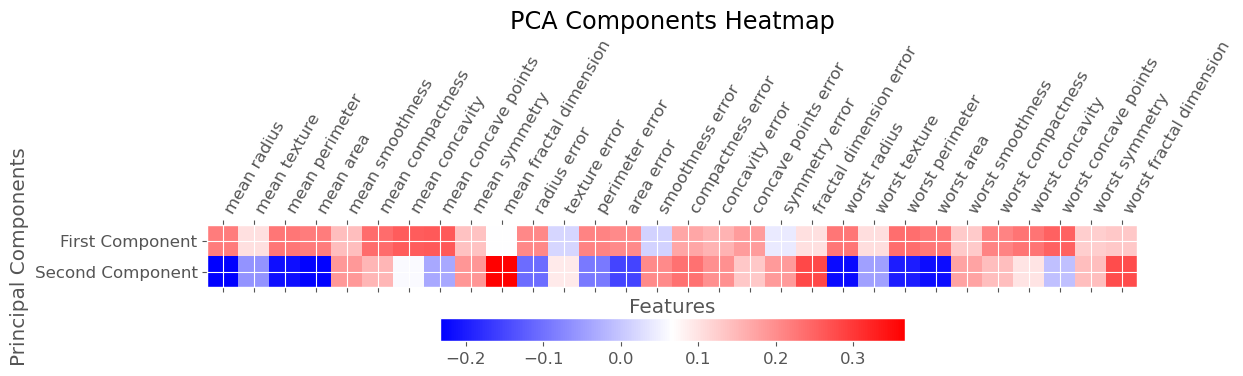

In [77]:
# contribution of each property to the components (code adapted from Guido and Mueller)

plt.figure(figsize=(12,4))
plt.matshow(pca.components_, cmap='bwr', fignum=1)  # Diverging colormap
plt.yticks([0, 1], ["First Component", "Second Component"])
plt.colorbar(orientation='horizontal', pad=0.1, shrink=0.5)
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.title("PCA Components Heatmap");

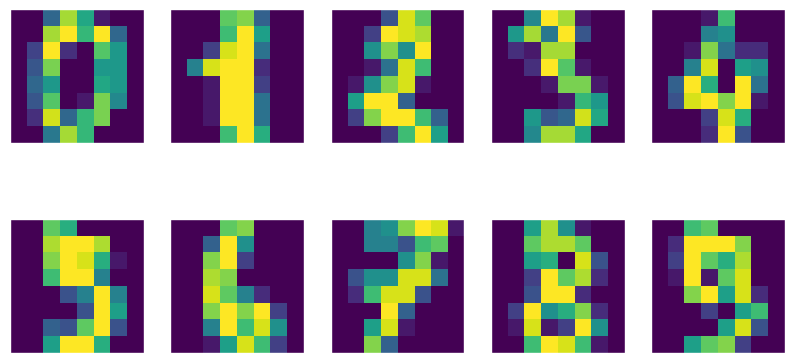

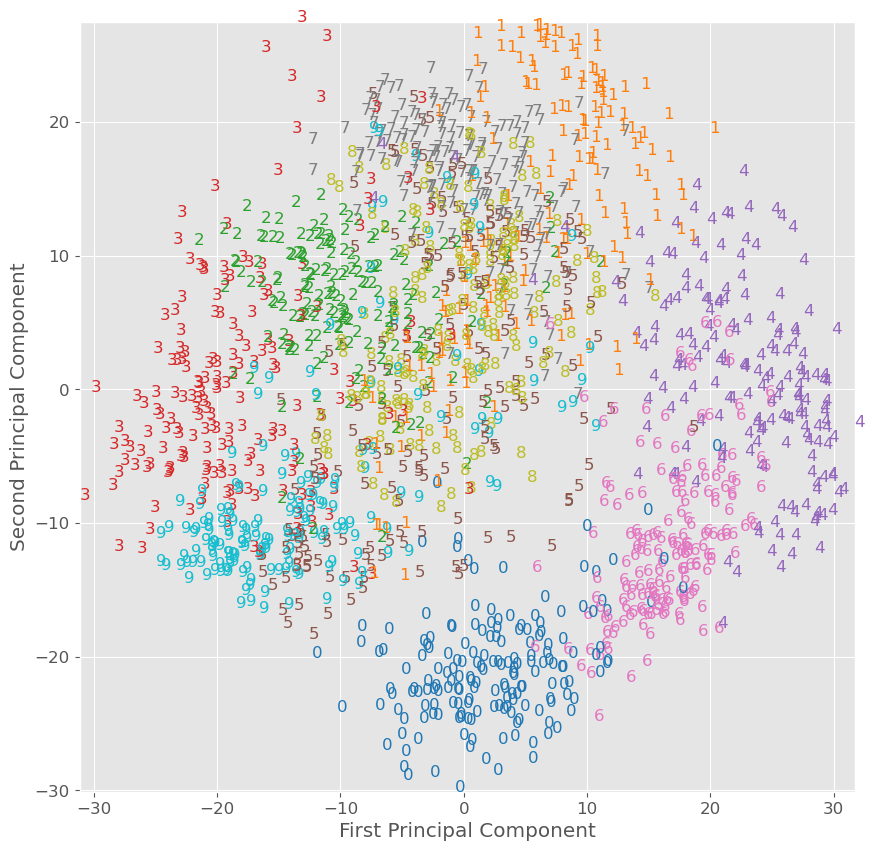

In [78]:
# pca for digits dataset (code adapted from Guido and Mueller)

from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

pca = PCA(n_components=2).fit(digits.data)
digits_pca = pca.transform(digits.data)

cmap = plt.colormaps.get_cmap("tab10")

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=cmap(digits.target[i]), fontdict={'size': 12})

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component");


## Manifold Learning

- A class of unsupervised machine learning techniques used for non-linear dimensionality reduction. 
- It assumes that high-dimensional data lies on a lower-dimensional manifold. 
- Unlike linear methods like PCA, manifold learning can capture complex structures and relationships in data, offering better clustering than linear methods.
- Manifold learning algorithms are mainly used for visualization and typically generate only two new features.
- These algorithms are often not suitable for supervised learning since they do not allow transformations of test data.

Reference: A bit advanced but it has all the necessary formulas in one place. Izenman, A. J. (2012). Introduction to manifold learning. WIREs Computational Statistics, 4(5), 439–446. https://doi.org/10.1002/wics.1222

### Few types

1. t-SNE (t-Distributed Stochastic Neighbor Embedding): Preserves local structures and is widely used for data visualization.
2. LLE (Locally Linear Embedding): Maintains local neighborhood relationships while reducing dimensions.
3. Isomap (Isometric Mapping): Uses geodesic distances to maintain global structure.
4. UMAP (Uniform Manifold Approximation and Projection): Similar to t-SNE but computationally more efficient.

### One example: t-SNE

- t-SNE creates a two-dimensional representation that preserves local distances. It transforms only the training data and cannot be applied to new data.
- It emphasizes maintaining the relationships between nearby points while de-emphasizing far-apart ones.

### Issues of t-SNE

- Be aware that t-SNE has often generated heated controversy, like this: Chari, T., & Pachter, L. (2023). The specious art of single-cell genomics. PLOS Computational Biology, 19(8), e1011288. https://doi.org/10.1371/journal.pcbi.1011288

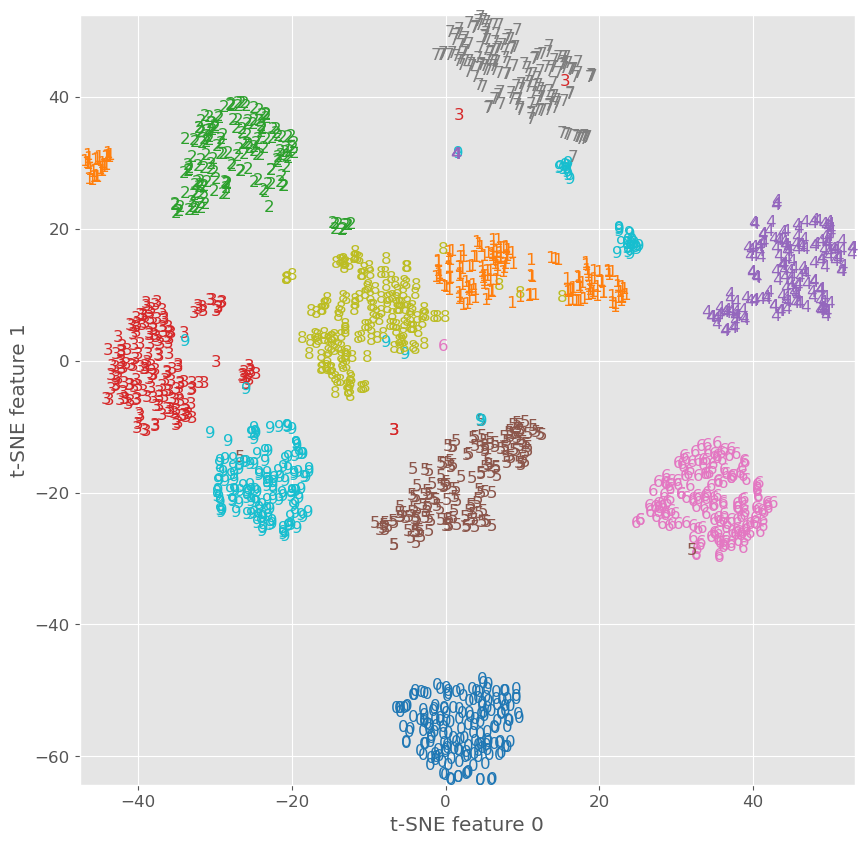

In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(random_state=18)
digits_tsne = tsne.fit_transform(digits.data)
cmap = plt.colormaps.get_cmap("tab10")

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i, (x, y) in enumerate(digits_tsne):
    plt.text(x, y, str(digits.target[i]), color=cmap(digits.target[i]), fontdict={'size': 12})

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1");

## Clustering

- Clustering involves partitioning a dataset into groups of `related/similar` elements—clusters.  
- Points within a cluster are similar; points in different clusters are distinct.  
 


### $k$-means clustering

- k-Means clustering is a simple and widely used clustering algorithm.  
- It finds cluster centers that represent specific regions of the data.

#### Algorithm

1. *Choose* the number of clusters ($k$).
2. *Initialize centroids*: Randomly select $k$ data points as initial cluster centroids.  
3. *Assign each data point to the nearest centroid*: Compute the distance between each point and all centroids and assign it to the closest centroid (i.e., cluster)
4. *Update centroids*: Compute the new centroid of each cluster as the mean of all assigned points.
5. *Repeat steps 3 and 4*:
   - Reassign points based on new centroids.
   - Update centroids again.
   - Continue until centroids no longer change significantly or a stopping criterion is met.



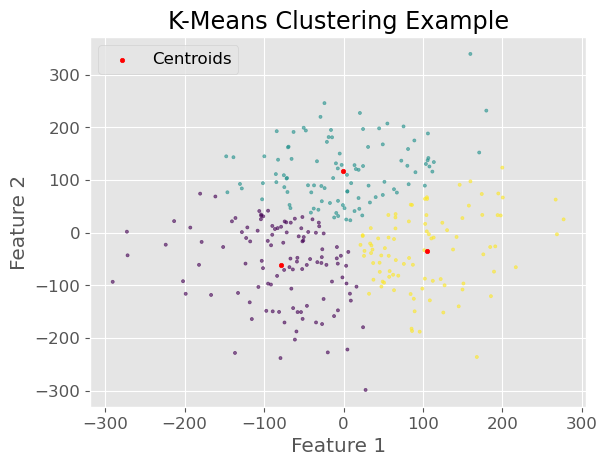

In [87]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# generate sample data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=100, random_state=3)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=6, n_init=10)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.6, s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=10, label="Centroids")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Example");
